# TalentSprint

## Objectives

At the end of the experiment, you will be to 
* understand Ensemble methods like bagging and boosting

## Dataset

The dataset choosen for this experiment is make_blobs() dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

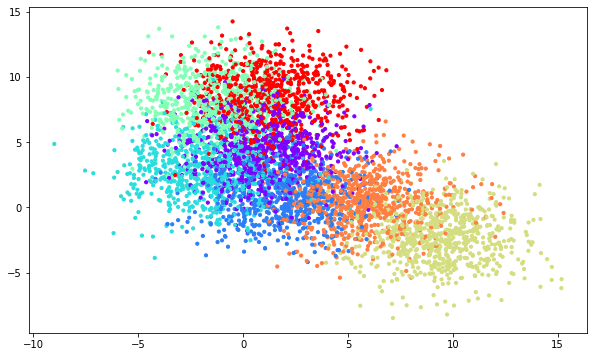

In [ ]:
X, y = make_blobs(n_samples=5000, centers=7,
                  random_state=0, cluster_std=2.0)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='rainbow');
plt.show()

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)

In [ ]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
dt_train_pred = classifier.predict(X_train)
dt_test_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, dt_train_pred))
print(accuracy_score(y_test, dt_test_pred))

0.7991044776119403
0.7957575757575758


**random forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [ ]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

print(accuracy_score(y_train, rf_train_pred))
print(accuracy_score(y_test, rf_test_pred))

0.9286567164179105
0.9127272727272727


##### **Bagging and Boosting**

In [ ]:
bg = BaggingClassifier(LogisticRegression(max_iter=1000), n_estimators=100)
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000),
                  n_estimators=100)

In [ ]:
print(bg.score(X_train, y_train))
print(bg.score(X_test,y_test))

0.9205970149253732
0.9242424242424242


**Boosting**

In [ ]:
ad = AdaBoostClassifier(RandomForestClassifier(n_estimators=25, max_depth=5), n_estimators=100, learning_rate=0.001)
ad.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                         n_estimators=25),
                   learning_rate=0.001, n_estimators=100)

In [ ]:
print(ad.score(X_train, y_train))
ad.score(X_test,y_test)

0.9298507462686567


0.9157575757575758

In [ ]:
ab_pred = ad.predict(X_test)

In [ ]:
accuracy_score(y_test, ab_pred)

0.9157575757575758

In [ ]:
train_pred = ad.predict(X_train)
accuracy_score(y_train, train_pred)

0.9298507462686567